In [1]:
print("Hello world")

Hello world


In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np

In [4]:
BostonData = pd.read_csv("./data/BostonHousingData.csv")

In [5]:
print("Shape before deleting duplicate values", BostonData.shape)
BostonData = BostonData.drop_duplicates()
print("Shape after deleteing duplicate values", BostonData.shape)

Shape before deleting duplicate values (506, 14)
Shape after deleteing duplicate values (506, 14)


In [6]:
BostonData

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Defining the problem statement
#### Create a ML model which can predict the price(MEDV) of a house
<ul>
    <li>Target values: MEDV</li>
    <li>Predictors: CRIM, ZN, INDUS, CHAS, NOX, RM, etc. </li>
</ul>

# Determining the type of Machine Learning 
Based on the problem statement you can understand that we need to create a <b>supervised ML Regression Model</b>, as the target variable is Continuous

# Looking at the distribution of Target variable
<ul>
<li>If target variable's distribution is too skewed then the predictive modeling will not be possible.</li>
<li>Bell curve is desirable but slightly positive skew or negative skew is also fine</li>
<li>When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.</li>
</ul>

In [7]:
%matplotlib inline

<Axes: >

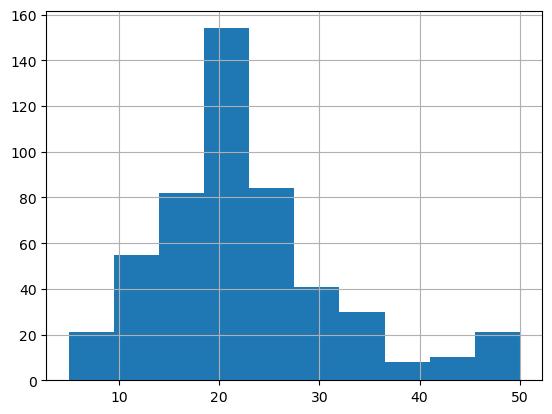

In [8]:
BostonData["MEDV"].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows of each type of values to learn from.

# Basic Data Exploration

In [9]:
BostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
BostonData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [11]:
BostonData.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
BostonData.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

# Basic Data Exploration Result
Based on the basic exploration above, we can create a simple report of the data.

# Visual Exploratory Data Analysis
<ul>
<li>Categorical variables: Bar plot</li>
<li>Continuous variables: Histogram </li>
</ul>

### Bar graphs
<ul>
<li>Plotting multiple bar charts at once for categorical variables.</li>
<li>Since there is no default function which can plot bar charts for multiple columns at once.</li>
<li> We are defining our own function for the same.</li>
</ul>


In [13]:
def plotBarCharts(inpData, colsToPlot):
    import matplotlib.pyplot as plt
    %matplotlib inline

    fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20, 5))
    fig.suptitle('Bar charts of: '+str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

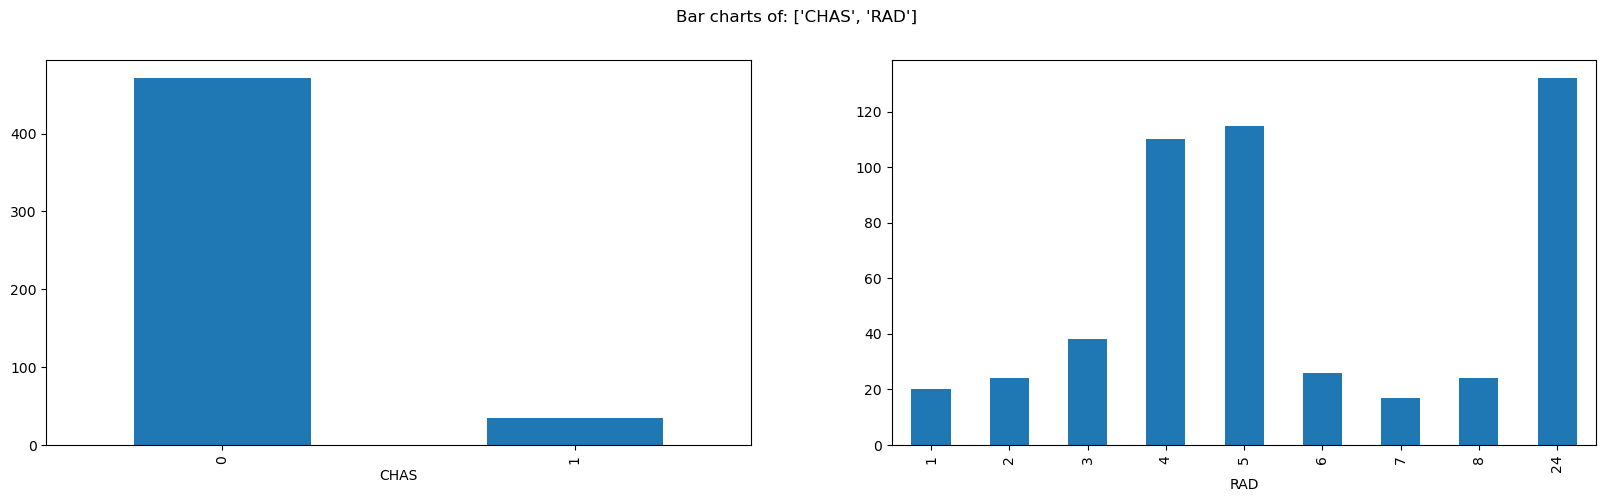

In [14]:
plotBarCharts(inpData=BostonData, colsToPlot=["CHAS", "RAD"])

# Bar Charts Interpretation

In this data, 'CHAS' is skewed. There is just one bar which is dominating and other one have very less rows. Such columns may not be correlated with the target variable because there is no information to learn. The algorithms cannot find any rule like when the value in this then the target variable is that.

### Visualiza distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, there are eleven continous predictor variables 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B' and 'LSTAT'

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'DIS'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>],
       [<Axes: title={'center': 'B'}>, <Axes: title={'center': 'LSTAT'}>,
        <Axes: >]], dtype=object)

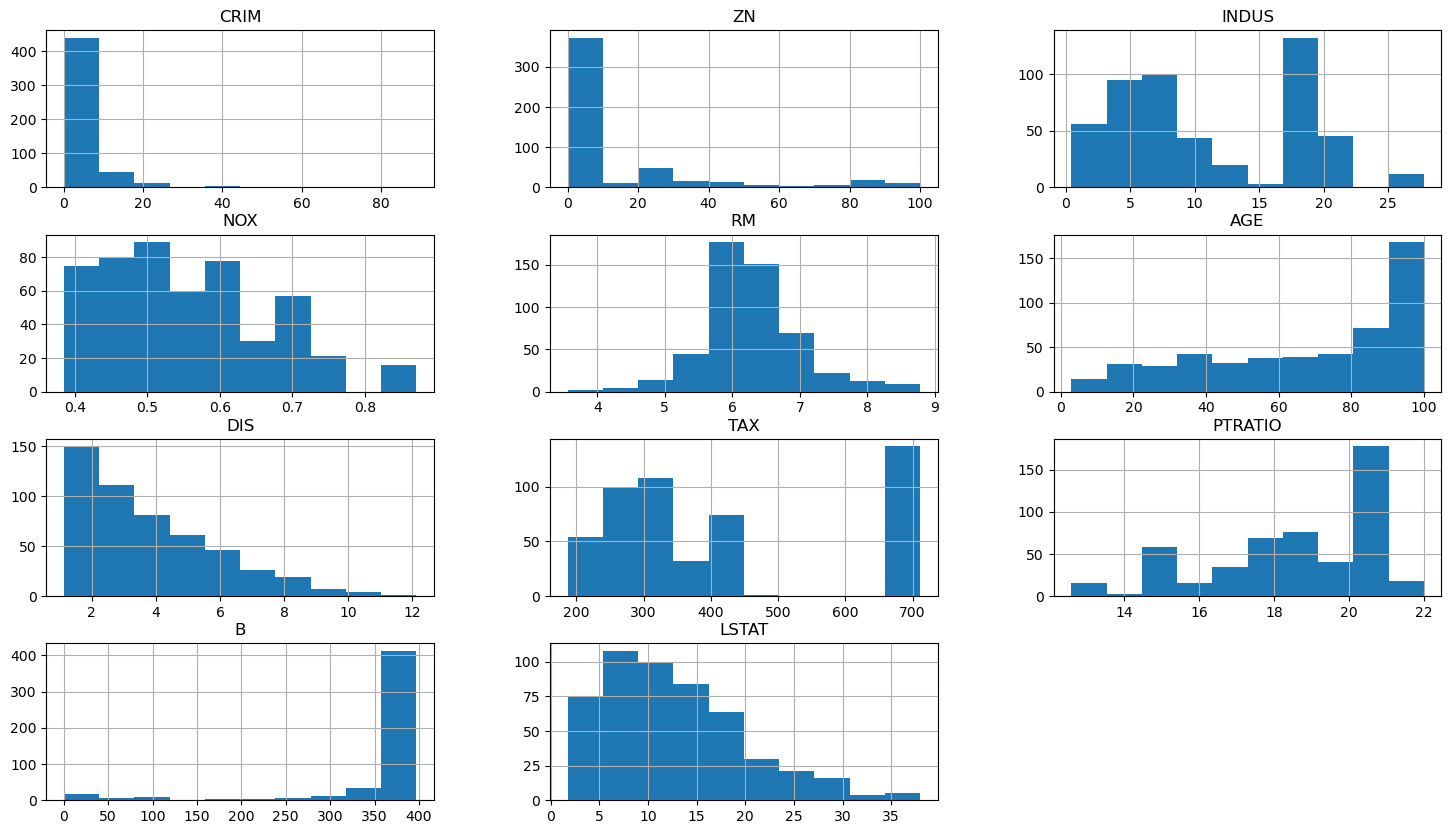

In [15]:
# Ploting histogram of multiple columns
BostonData.hist(
    ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT"],
    figsize=(18, 10),
)

## Histogram Interpretation
<b>Selected Continuous Variables: </b>
<ul>
<li><b>CRIM</b>: Selected. Outliers seen beyond 40, need to treat them.</li>
<li><b>ZN</b>: Selected. The distribution is good</li>
<li><b>INDUS</b>: Selected. The distribution is good</li>
<li><b>NOX</b>: Selected. The distribution is good</li>
<li><b>RM</b>: Selected. The distribution is good</li>
<li><b>AGE</b>: Selected. The distribution is good</li>
<li><b>DIS</b>: Selected. The distribution is good</li>
<li><b>TAX</b>: Selected. The distribution is good</li>
<li><b>PTRATIO</b>: Selected. The distribution is good</li>
<li><b>B</b>: Selected. The distribution is good</li>
<li><b>LSTAT</b>: Selected. The distribution is good</li>
</ul>

### Outlier treatment
#### Replacing outliers for 'CRIM'

In [16]:
# finding nearest values to 60 mark
BostonData["CRIM"][BostonData["CRIM"] < 60].sort_values(ascending=False)

410    51.13580
414    45.74610
404    41.52920
398    38.35180
427    37.66190
         ...   
55      0.01311
341     0.01301
285     0.01096
284     0.00906
0       0.00632
Name: CRIM, Length: 503, dtype: float64

Above result shows the nearest logic value is 51.13. Hence, replacing any value above 60 with it

In [17]:
# replacing outliers with nearest possible value
BostonData["CRIM"][BostonData["CRIM"] > 60] = 51.13

# Visualizing Distribution after outlier treatment
The distribution improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable

array([[<Axes: title={'center': 'CRIM'}>]], dtype=object)

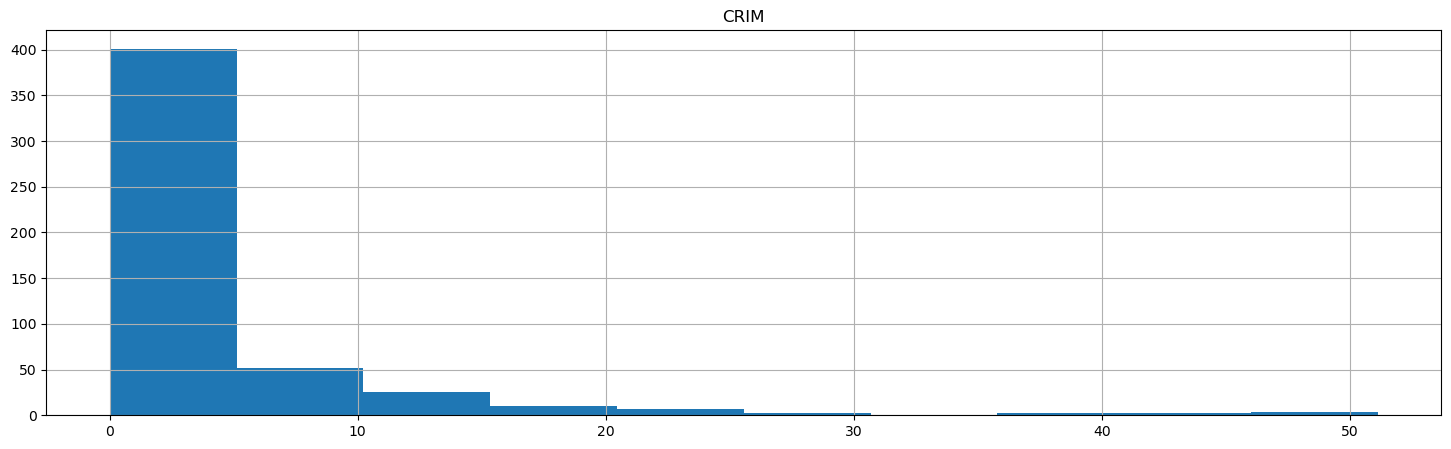

In [18]:
BostonData.hist(["CRIM"], figsize=(18, 5))

# Missing values treatment

In [19]:
# finding how many missing values are there for each column
BostonData.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No missing values in this data

### Visual exploration of relationship between variables
<ul>
   <li> Continuous Vs Continuous ---- Scatter Plot </li>
    <li> Categorical Vs Continuous---- Box Plot </li>
    <li> Categorical Vs Categorical---- Grouped Bar Plots </li>
</ul>

### Statistical measurement of relationship strength between variables
<ul>
    <li>Continuous Vs Continuous ---- Correlation matrix </li>
    <li> Categorical Vs Continuous---- ANOVA test </li>
    <li>Categorical Vs Categorical--- Chi-Square test </li>
</ul>



## Relationship exploration: Continuous Vs Continuous -- Scatter Charts

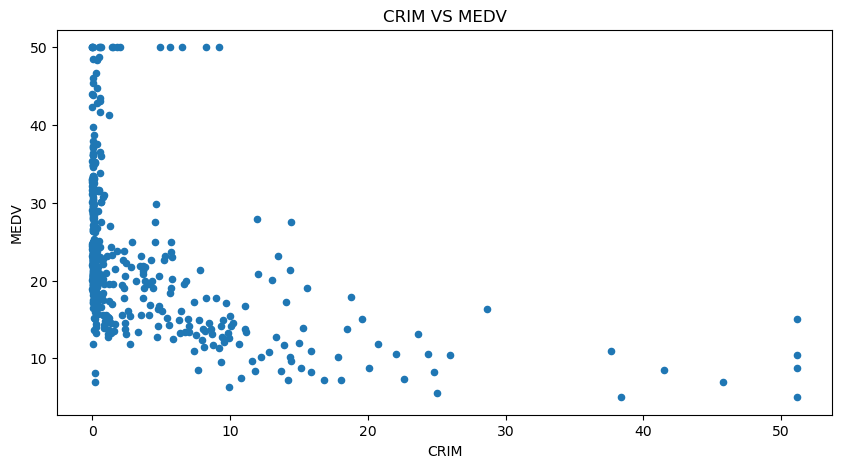

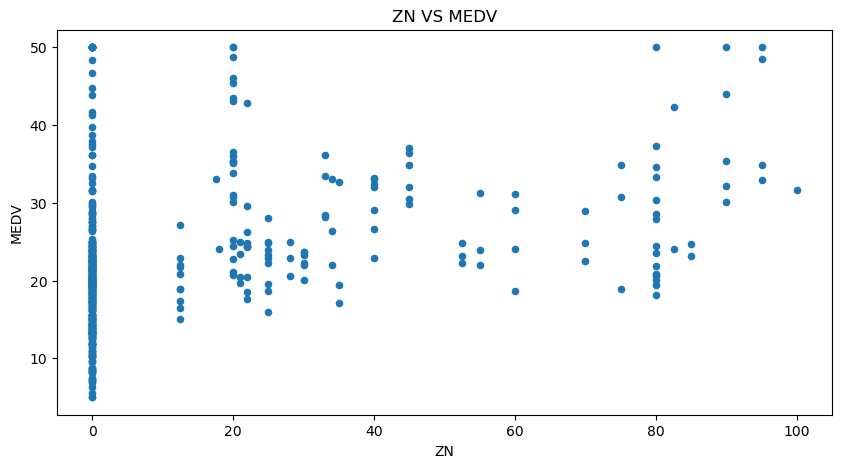

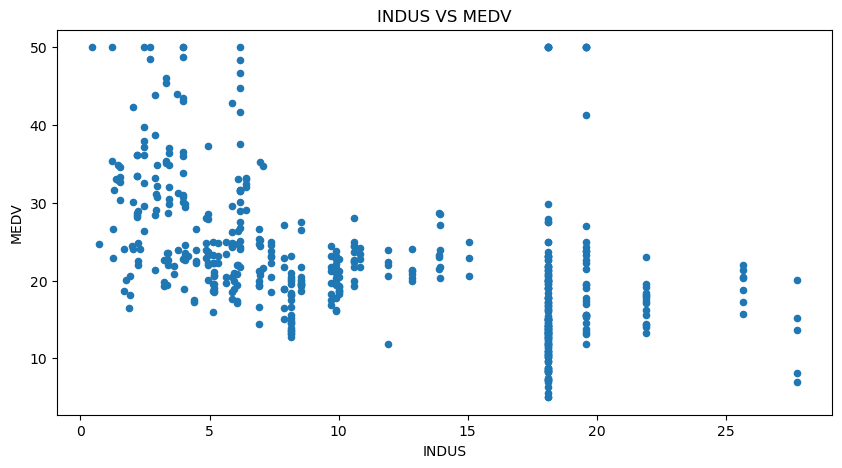

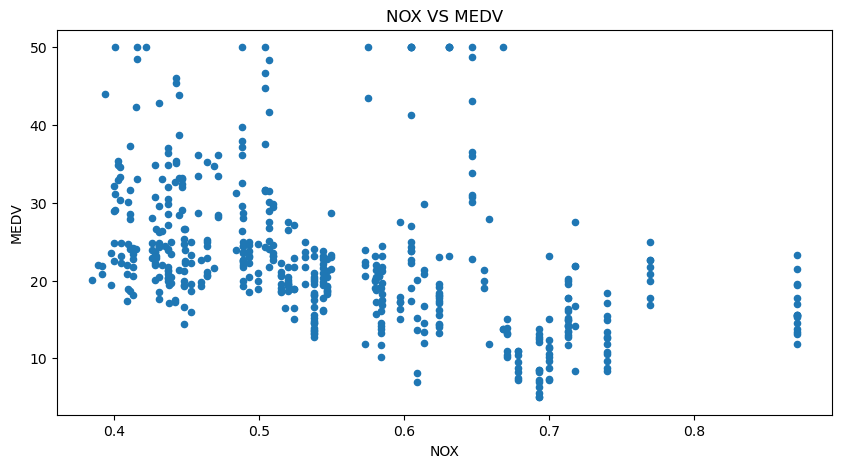

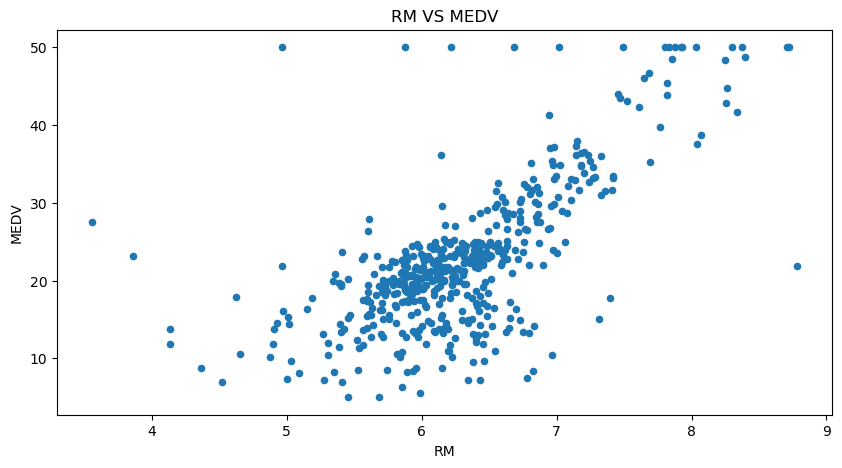

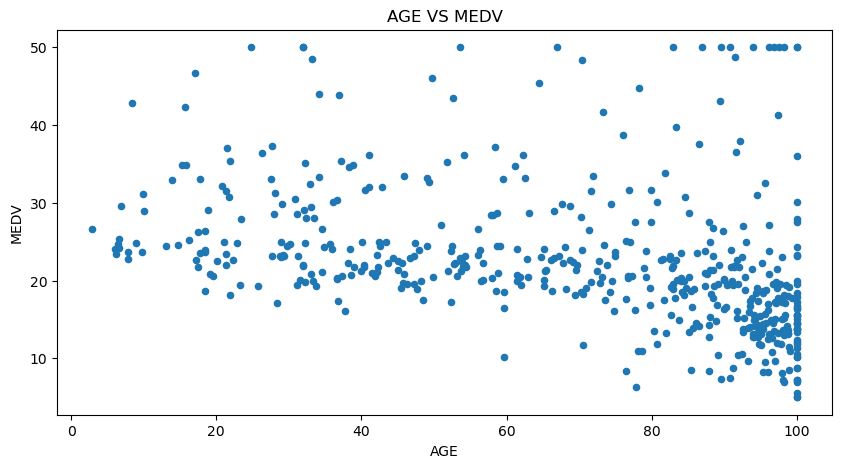

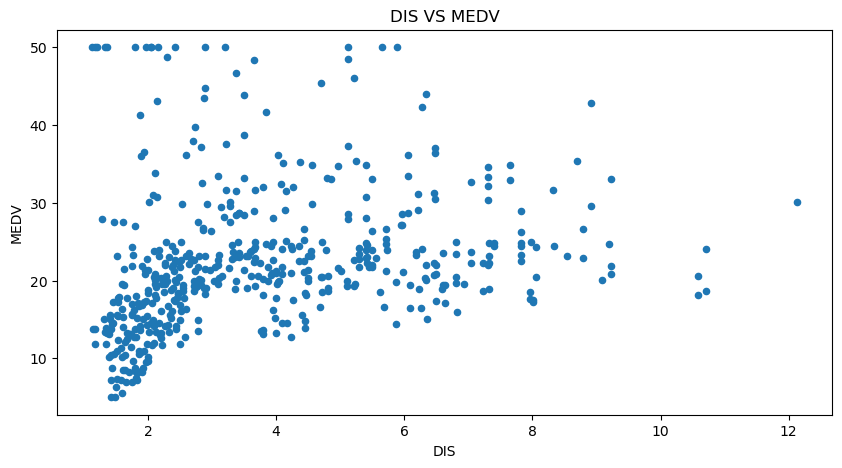

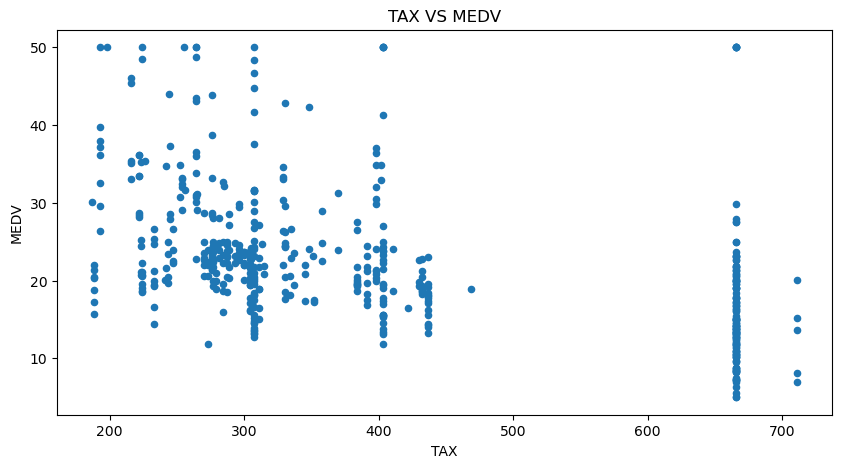

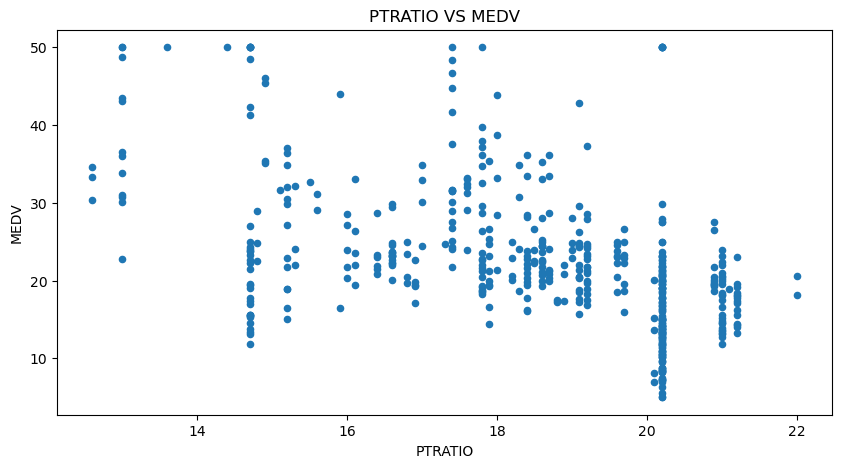

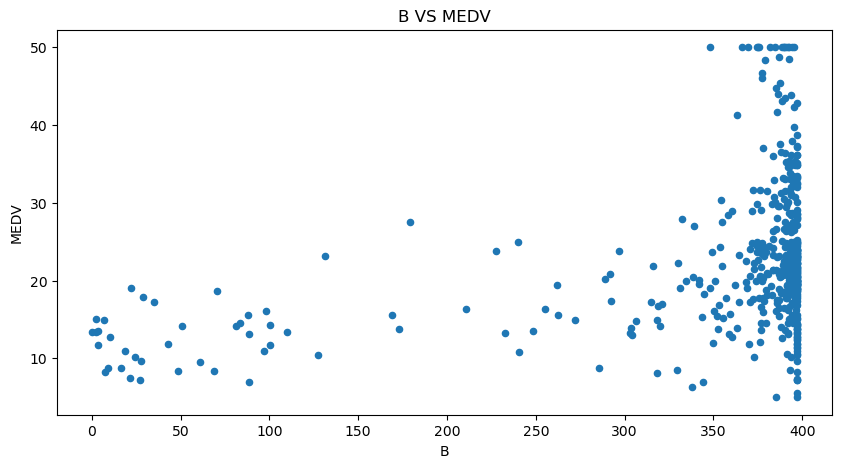

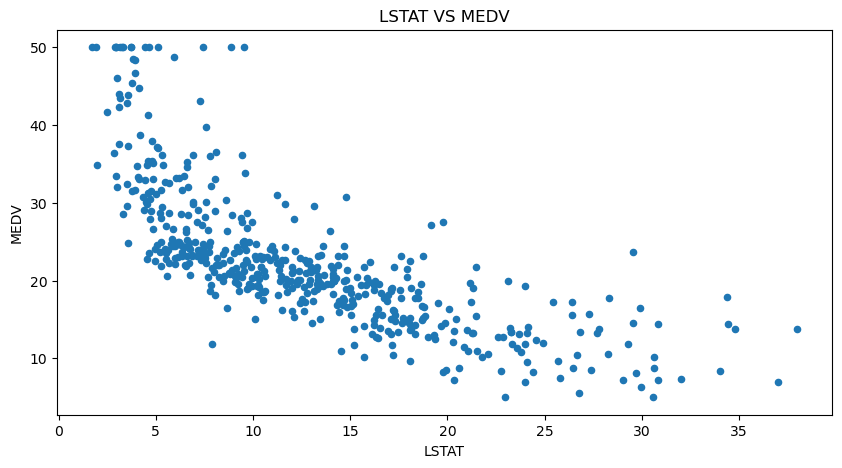

In [20]:
ContinuousCols = [
    "CRIM",
    "ZN",
    "INDUS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
]

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    BostonData.plot.scatter(
        x=predictor, y="MEDV", figsize=(10, 5), title=predictor + " VS " + "MEDV"
    )

## Scatter charts interpretation

### What should you look for in these scatter charts?

Trend. You should try to see if there is a visible trend or not. There could be three scenarios
<ol>
   <li> Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML! </li>

   <li> Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML! </li>
    <li> No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML. </li>
</ol>

Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value.


## Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [21]:
# Calculating correlation matrix
ContinuousCols = [
    "MEDV",
    "CRIM",
    "ZN",
    "INDUS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
]

# Creating the correlation matrix
CorrelationData = BostonData[ContinuousCols].corr()
CorrelationData

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.419265,0.360445,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.419265,1.000000,-0.222332,0.450375,0.466020,-0.257310,0.388784,-0.417941,0.643998,0.319489,-0.429858,0.508483
ZN,0.360445,-0.222332,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.450375,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800
NOX,-0.427321,0.466020,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.257310,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.388784,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.417941,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996
TAX,-0.468536,0.643998,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993
PTRATIO,-0.507787,0.319489,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044


In [22]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData["MEDV"][abs(CorrelationData["MEDV"]) > 0.5]

MEDV       1.000000
RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

<b> Final selected Continuous columns: </b> <br> <br>
'RM', 'PTRATIO', 'LSTAT'

## Relationship exploration: Categorical Vs Continuous -- Box Plots

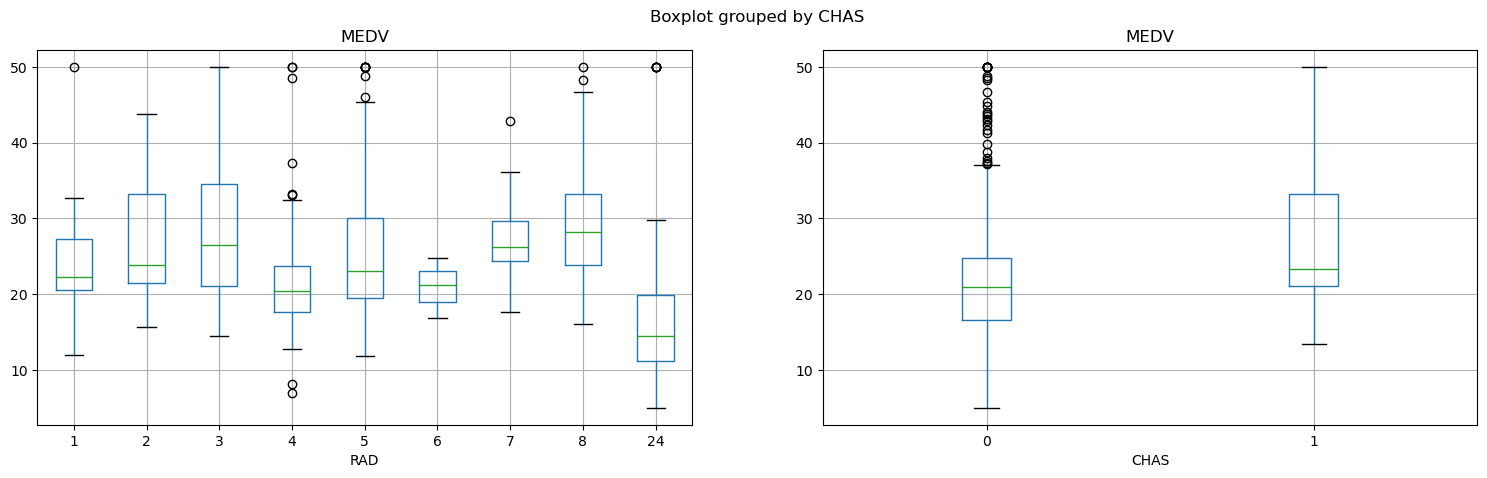

In [23]:
# Box plots for continuous Target Variable "MEDV" and Categorical predictors
CategoricalColsList = ["RAD", "CHAS"]

import matplotlib.pyplot as plt

fig, PlotCanvas = plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol, i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    BostonData.boxplot(
        column="MEDV", by=PredictorCol, figsize=(5, 5), vert=True, ax=PlotCanvas[i]
    )

## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [24]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors = []

    print("##### ANOVA Results ##### \n")
    for predictor in CategoricalPredictorList:
        CategoryGroupLists = inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if AnovaResults[1] < 0.05:
            print(
                predictor,
                "is correlated with",
                TargetVariable,
                "| P-Value:",
                AnovaResults[1],
            )
            SelectedPredictors.append(predictor)
        else:
            print(
                predictor,
                "is NOT correlated with",
                TargetVariable,
                "| P-Value:",
                AnovaResults[1],
            )

    return SelectedPredictors

In [25]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList = ["RAD", "CHAS"]
FunctionAnova(
    inpData=BostonData,
    TargetVariable="MEDV",
    CategoricalPredictorList=CategoricalPredictorList,
)

##### ANOVA Results ##### 

RAD is correlated with MEDV | P-Value: 3.1256493316010175e-24
CHAS is correlated with MEDV | P-Value: 7.390623170520815e-05


['RAD', 'CHAS']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable. This is something we guessed by looking at the box plots!

<b>Final selected Categorical columns:</b>

'RAD', 'CHAS'

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [26]:
SelectedColumns = ["RM", "PTRATIO", "LSTAT", "RAD", "CHAS"]

# selecting final columns
DataForML = BostonData[SelectedColumns]
DataForML.head()

,RM,PTRATIO,LSTAT,RAD,CHAS
0,6.575,15.3,4.98,1,0
1,6.421,17.8,9.14,2,0
2,7.185,17.8,4.03,2,0
3,6.998,18.7,2.94,3,0
4,7.147,18.7,5.33,3,0


In [27]:
# Saving this final data for reference during deployment
DataForML.to_pickle("../SavedModels/DataForML.pkl")

## Data Pre-processing for Machine Learning

List of steps performed on predictor variables before data can be used for machine learning
<ol>
    <li> Converting each Ordinal Categorical columns to numeric</li>
    <li>Converting Binary nominal Categorical columns to numeric using 1/0 mapping</li>
    <li>Converting all other nominal categorical columns to numeric using pd.get_dummies()</li>
    <li>Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks</li>
</ol>


In [28]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric = pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric["MEDV"] = BostonData["MEDV"]

# Printing sample rows
DataForML_Numeric.head()

,RM,PTRATIO,LSTAT,RAD,CHAS,MEDV
0,6.575,15.3,4.98,1,0,24.0
1,6.421,17.8,9.14,2,0,21.6
2,7.185,17.8,4.03,2,0,34.7
3,6.998,18.7,2.94,3,0,33.4
4,7.147,18.7,5.33,3,0,36.2


## Machine Learning: Splitting the data into Training and Testing sample

In [29]:
# printing all the column names for our reference
DataForML_Numeric.columns

Index(['RM', 'PTRATIO', 'LSTAT', 'RAD', 'CHAS', 'MEDV'], dtype='object')

In [30]:
# Separate Target variables and Predictor Variables
TargetVariable = "MEDV"
Predictors = ["RM", "PTRATIO", "LSTAT", "RAD", "CHAS"]

X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=428
)

## Standardization/Normalization of data

In [31]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
# PredictorScaler=StandardScaler()
PredictorScaler = MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X)

# Generating the standardized values of X
X = PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [32]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 5)
(354,)
(152, 5)
(152,)


# Multiple Linear Regression

In [33]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression

RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG = RegModel.fit(X_train, y_train)
prediction = LREG.predict(X_test)

from sklearn import metrics

# Measuring Goodness of fit in Training data
print("R2 Value:", metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print("\n##### Model Validation and Accuracy Calculations ##########")

# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[("Predicted" + TargetVariable)] = np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults["APE"] = 100 * (
    (abs(TestingDataResults["MEDV"] - TestingDataResults["PredictedMEDV"]))
    / TestingDataResults["MEDV"]
)

MAPE = np.mean(TestingDataResults["APE"])
MedianMAPE = np.median(TestingDataResults["APE"])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print(
    "Mean Accuracy on test data:", Accuracy
)  # Can be negative sometimes due to outlier
print("Median Accuracy on test data:", MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    # print('#'*70,'Accuracy:', 100-MAPE)
    return 100 - MAPE


# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer

custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print("\nAccuracy values for 10-fold Cross Validation:\n", Accuracy_Values)
print("\nFinal Average Accuracy of the model:", round(Accuracy_Values.mean(), 2))

LinearRegression()
R2 Value: 0.6980461431155771

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  MEDV  PredictedMEDV
0  0.547040  0.425532  0.201711  0.173913   0.0  23.6           27.0
1  0.612569  0.531915  0.049669  0.130435   1.0  32.4           35.0
2  0.464074  0.797872  0.450883  0.130435   0.0  13.6           16.0
3  0.479785  0.702128  0.104581  0.130435   0.0  22.8           25.0
4  0.524238  0.808511  0.428808  1.000000   0.0  16.1           18.0
Mean Accuracy on test data: 81.80618534324392
Median Accuracy on test data: 88.88888888888889

Accuracy values for 10-fold Cross Validation:
 [88.78472351 90.01462311 82.93367348 82.14573469 86.66783537 88.63411206
 84.88621233 48.83600797 51.6418211  85.29449921]

Final Average Accuracy of the model: 78.98


# Decision Trees

DecisionTreeRegressor(max_depth=5)
R2 Value: 0.900709602721074

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  MEDV  PredictedMEDV
0  0.547040  0.425532  0.201711  0.173913   0.0  23.6           22.0
1  0.612569  0.531915  0.049669  0.130435   1.0  32.4           30.0
2  0.464074  0.797872  0.450883  0.130435   0.0  13.6           16.0
3  0.479785  0.702128  0.104581  0.130435   0.0  22.8           25.0
4  0.524238  0.808511  0.428808  1.000000   0.0  16.1           16.0
Mean Accuracy on test data: 84.90486272960791
Median Accuracy on test data: 89.73677103027029

Accuracy values for 10-fold Cross Validation:
 [85.70291249 91.67430612 87.50651521 86.87328743 87.954766   87.72298756
 88.56381116 60.06188525 74.27758535 73.54170234]

Final Average Accuracy of the model: 82.39


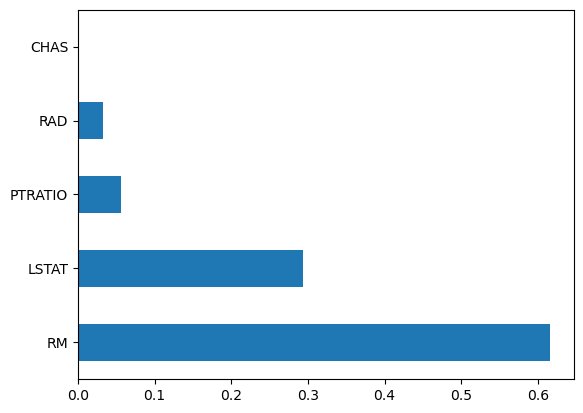

In [34]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
RegModel = DecisionTreeRegressor(max_depth=5)
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [35]:
import os

os.environ["PATH"] += (
    os.pathsep
    + r"D:\Program Files (x86)\Anaconda\Lib\site-packages\graphviz-0.20.1.dist-info"
)

# Random Forest

RandomForestRegressor(max_depth=4, n_estimators=400)
R2 Value: 0.8918608945815919

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  MEDV  PredictedMEDV
0  0.547040  0.425532  0.201711  0.173913   0.0  23.6           22.0
1  0.612569  0.531915  0.049669  0.130435   1.0  32.4           33.0
2  0.464074  0.797872  0.450883  0.130435   0.0  13.6           17.0
3  0.479785  0.702128  0.104581  0.130435   0.0  22.8           24.0
4  0.524238  0.808511  0.428808  1.000000   0.0  16.1           16.0
Mean Accuracy on test data: 86.0390236922711
Median Accuracy on test data: 91.75257731958762

Accuracy values for 10-fold Cross Validation:
 [89.26379288 93.2857523  86.99573885 88.14214169 88.63268749 90.20191047
 86.41900915 62.11752693 73.29836533 80.33707611]

Final Average Accuracy of the model: 83.87


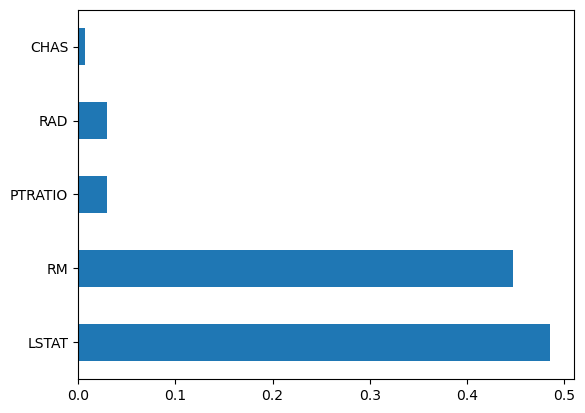

In [36]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400)
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Adaboost ML

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)


R2 Value: 0.8777945175090143

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  MEDV  PredictedMEDV
0  0.547040  0.425532  0.201711  0.173913   0.0  23.6           22.0
1  0.612569  0.531915  0.049669  0.130435   1.0  32.4           33.0
2  0.464074  0.797872  0.450883  0.130435   0.0  13.6           17.0
3  0.479785  0.702128  0.104581  0.130435   0.0  22.8           27.0
4  0.524238  0.808511  0.428808  1.000000   0.0  16.1           17.0
Mean Accuracy on test data: 83.21513690469908
Median Accuracy on test data: 87.84305161243358

Accuracy values for 10-fold Cross Validation:
 [87.19720905 89.61266422 87.96831801 86.54391772 86.65893291 86.10740571
 80.41150417 57.83390915 70.37436603 80.94274339]

Final Average Accuracy of the model: 81.37


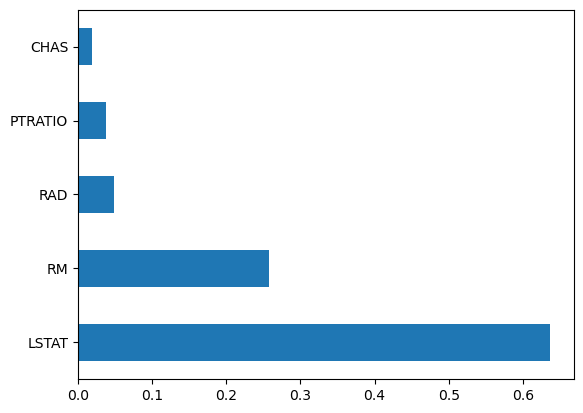

In [37]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# XGBoost

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)
[23:42:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Prediction [25.40517  

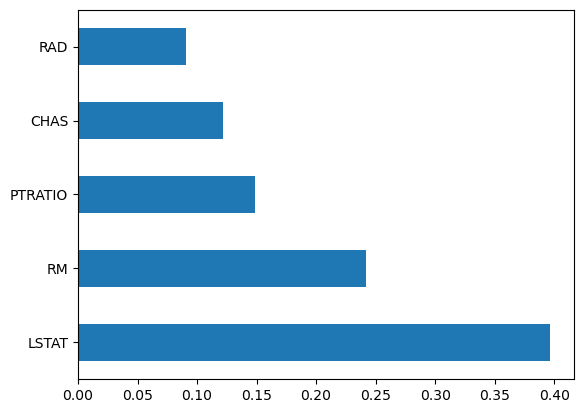

In [38]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, 
                      learning_rate=0.1, 
                      n_estimators=1000, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)
print("Prediction", prediction)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# KNN

In [39]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor

RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN = RegModel.fit(X_train, y_train)
prediction = KNN.predict(X_test)

from sklearn import metrics

# Measuring Goodness of fit in Training data
print("R2 Value:", metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print("\n##### Model Validation and Accuracy Calculations ##########")

# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[("Predicted" + TargetVariable)] = np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults["APE"] = 100 * (
    (abs(TestingDataResults["MEDV"] - TestingDataResults["PredictedMEDV"]))
    / TestingDataResults["MEDV"]
)

MAPE = np.mean(TestingDataResults["APE"])
MedianMAPE = np.median(TestingDataResults["APE"])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print(
    "Mean Accuracy on test data:", Accuracy
)  # Can be negative sometimes due to outlier
print("Median Accuracy on test data:", MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    # print('#'*70,'Accuracy:', 100-MAPE)
    return 100 - MAPE


# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer

custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print("\nAccuracy values for 10-fold Cross Validation:\n", Accuracy_Values)
print("\nFinal Average Accuracy of the model:", round(Accuracy_Values.mean(), 2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.8876178537009081

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  MEDV  PredictedMEDV
0  0.547040  0.425532  0.201711  0.173913   0.0  23.6           25.0
1  0.612569  0.531915  0.049669  0.130435   1.0  32.4           34.0
2  0.464074  0.797872  0.450883  0.130435   0.0  13.6           16.0
3  0.479785  0.702128  0.104581  0.130435   0.0  22.8           23.0
4  0.524238  0.808511  0.428808  1.000000   0.0  16.1           15.0
Mean Accuracy on test data: 85.9476312344639
Median Accuracy on test data: 89.82758620689656

Accuracy values for 10-fold Cross Validation:
 [86.76784363 89.2951359  87.20118045 84.89757598 86.22512671 89.58047045
 88.19801647 61.55065249 75.95669044 78.49115516]

Final Average Accuracy of the model: 82.82


# SVM

In [40]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.598338644949573

##### Model Validation and Accuracy Calculations ##########
         RM   PTRATIO     LSTAT       RAD  CHAS  MEDV  PredictedMEDV
0  0.547040  0.425532  0.201711  0.173913   0.0  23.6           25.0
1  0.612569  0.531915  0.049669  0.130435   1.0  32.4           30.0
2  0.464074  0.797872  0.450883  0.130435   0.0  13.6           18.0
3  0.479785  0.702128  0.104581  0.130435   0.0  22.8           24.0
4  0.524238  0.808511  0.428808  1.000000   0.0  16.1           16.0
Mean Accuracy on test data: 83.34072262551857
Median Accuracy on test data: 88.8888888888889



Accuracy values for 10-fold Cross Validation:
 [88.37420022 91.4513705  87.68143773 79.82823369 86.15226484 83.80493943
 88.12447341 61.52166008 63.3626039  80.79728051]

Final Average Accuracy of the model: 81.11


# Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing XGboost as the final model it has the highest accuracy!

In order to deploy the model we follow below steps
<ol>
    <li>Train the model using 100% data available</li>
    <li>Save the model as a serialized file which can be stored anywhere</li>
    <li>Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction</li>
</ol>


In [41]:
# Separate Target Variable and Predictor Variables
TargetVariable = "MEDV"

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors = ["LSTAT", "RM", "PTRATIO"]

X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
# PredictorScaler=StandardScaler()
PredictorScaler = MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X)

# Generating the standardized values of X
X = PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(506, 3)
(506,)


Cross validating the final model accuracy with less predictors

In [42]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor

RegModel = XGBRegressor(
    max_depth=2,
    learning_rate=0.1,
    n_estimators=1000,
    objective="reg:linear",
    booster="gbtree",
)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print("\nAccuracy values for 10-fold Cross Validation:\n", Accuracy_Values)
print("\nFinal Average Accuracy of the model:", round(Accuracy_Values.mean(), 2))

[23:42:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


[23:42:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:42:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscal

<b>Step 1:</b> Retraining the model using 100% data

In [43]:
# Training the model on 100% Data available
Final_XGB_Model = RegModel.fit(X, y)

[23:42:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


<b>Step 2:</b> Save the model as a serialized file which can be stored anywhere

In [44]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open("Final_XGB_Model.pkl", "wb") as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print("pickle file of Predictive Model is saved at Location:", os.getcwd())

pickle file of Predictive Model is saved at Location: d:\College\SEM-7\Internship-Project\notebooks


<b>Step 3:</b> Create a python function

In [45]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd

    Num_Inputs = InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML = pd.read_pickle(
        r"D:\College\SEM-7\Internship 2 weeks final\SavedModels\DataForML.pkl"
    )
    InputData = InputData.append(DataForML)

    # Generating dummy variables for rest of the nominal variables
    InputData = pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors = ["LSTAT", "RM", "PTRATIO"]

    # Generating the input values to the model
    X = InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X = PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle

    with open(
        r"D:\College\SEM-7\Internship 2 weeks final\SavedModels\Final_XGB_Model.pkl",
        "rb",
    ) as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction = PredictionModel.predict(X)
    PredictionResult = pd.DataFrame(Prediction, columns=["Prediction"])
    return PredictionResult

In [46]:
# Calling the function for some loan applications
NewSampleData = pd.DataFrame(
    data=[[4.98, 6.575, 15.3], [4.98, 3.2, 10.3]], columns=["LSTAT", "RM", "PTRATIO"]
)

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   LSTAT     RM  PTRATIO
0   4.98  6.575     15.3
1   4.98  3.200     10.3


,Prediction
0,25.846903
1,23.979792



# Deploying a predictive model as an API
<ul>
    <li>Django and flask are two popular ways to deploy predictive models as a web service</li>
    <li>You can call your predictive models using a URL from any front end like tableau, java or angular js</li>



In [47]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_LSTAT, inp_RM, inp_PTRATIO):
    # Creating a data frame for the model input
    SampleInputData = pd.DataFrame(
        data=[[inp_LSTAT, inp_RM, inp_PTRATIO]], columns=["LSTAT", "RM", "PTRATIO"]
    )

    # Calling the function defined above using the input parameters
    Predictions = FunctionPredictResult(InputData=SampleInputData)

    # Returning the predictions
    return (Predictions.to_json().split(":")[-1].split("}")[0])
    # return "Hello"


# Function call
FunctionGeneratePrediction(inp_LSTAT=4.98, inp_RM=6.5, inp_PTRATIO=15.3)

'25.5554847717'

In [48]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [49]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        LSTAT_value = float(request.args.get('LSTAT'))
        RM_value=float(request.args.get('RM'))
        PTRATIO_value=float(request.args.get('PTRATIO'))
                
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_LSTAT=LSTAT_value,
                                                       inp_RM=RM_value,
                                                       inp_PTRATIO=PTRATIO_value
                                                )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

In [50]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8080
Press CTRL+C to quit
127.0.0.1 - - [20/Aug/2023 23:44:20] "GET /prediction_api?LSTAT=5.0&RM=6.5&PTRATIO=12.3 HTTP/1.1" 200 -
127.0.0.1 - - [20/Aug/2023 23:52:00] "GET /prediction_api?LSTAT=5.0&RM=6.5&PTRATIO=12.3 HTTP/1.1" 200 -
